<img src="Figuras - Desafio 2/logo.png" style="width:1450px;height:150px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: Gabriel Pereira e Isabela Beneti
### Desafio 2

#
## Descrição do desafio
O segundo desafio para solução do problema principal da disciplina envolve:

#### **A separação dos líquidos na mistura e a evaporação do combustível**

## Problemas

#### As tabelas de variáveis termodinâmicas são dadas para condições padrão de temperatura e pressão. No caso da temperatura, se uma determinada reação química for usada em uma temperatura diferente da padrão, correções devem ser feitas.

##### A. Volume da mistura de líquidos.
##### B. Determinação da separação da mistura.
##### C. Determinação da evaporação da mistura enriquecida em etanol.
##### D. Formação de Hidrogênio a partir da água. (Extra)

#
## Resoluções

### Importações

In [1]:
# Rode essa célula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_2 import *
import imageio
import warnings

### Esquema do Curso e Desafios

<center>
  <img src='./Figuras - Desafio 2/Esquema do Curso.png' style="width:900px;height:500px"/>
    
    Figura 1: esquema do curso e desafios
</center>

### Problema A

#### Objetivo: 
Calcular o volume da mistura de dois líquidos

#### O que temos: 
- Razão volumétrica da mistura
- Densidade de cada substância
- Tabela com densidade da substância por razão em massa e temperatura

#### O que iremos fazer:
- Uma função que calcula a razão em massa da mistura a partir da razão volumétrica e da densidade de cada substância
- Encontrar a densidade da mistura levando em conta a razão em massa da mistura e da temperatura (ambiente).
- Uma função que calcula, a partir da densidade da mistura e da massa total, o volume total da mistura.

Em sala de aula, o professor Amauri estabeleceu uma massa total padrão da mistura: uma tonelada. A partir disso, podemos chegar ao volume da nossa mistura se tivermos o valor da densidade da nossa mistura na razão de etanol que escolhemos. 

Esse valor pode ser encontrado na literatura, como mostrado na tabela 1, mas ele é dado em função da razão **em massa** de etanol na mistura. Entretanto, nós só temos as razões **em volume** (40%) e **molar** (0.17). Logo, se faz necessário calcular a razão **em massa** de etanol na mistura, a partir da porcentagem em volume.

Para tanto, desenvolvemos a função "porcentagem_em_massa" que, a partir dos valores da razão (porcentagem) **em volume do etanol**, determinada no Desafio 1 como 40%, e das densidades do etanol e da água, retorna a razão em porcentagem de etanol na solução:

In [2]:
######################## Calculando a porcentagem em massa do etanol na nossa mistura de 40% v/v ########################

PORCENTAGEM_MASSA_ETANOL = porcentagem_em_massa(40, 0.789, 0.9982)
PORCENTAGEM_MASSA_ETANOL

34.50990683637318

Portanto, a porcentagem de masssa de etanol na nossa mistura é de cerca de 34.5%.

Agora, vamos para a literatura encontrar a densidade da mistura de etanol e água exatamente nessa proporção:

<center>
  <img src='./Figuras - Desafio 2/Tabela_densidade.png' style="width:1200px;height:200px"/>
    
    Tabela 1: densidade da mistura de etanol com água nas concentrações de 34.0% até 34.9% v/v de etanol
</center>

Fonte: [HandyMath](https://www.handymath.com/cgi-bin/ethanolwater3.cgi?submit=Entry)

Conforme a tabela, a densidade da mistura de água e etanol com etanol a 34.5% m/m é 0.94587

Por fim, basta dividir o valor da massa da mistura (definida, pelo professor, como 1000 kg) por essa densidade- conta que é feita pela função "volume_total_mistura".

In [3]:
######################## Calculando volume total da mistura a partir da densidade dada pela tabela ########################

DENSIDADE_ETANOL_AGUA = 0.94587
VOLUME_TOTAL_MISTURA = volume_total_mistura(DENSIDADE_ETANOL_AGUA, 1000)

Chegamos, enfim, o volume da mistura: aproximadamente 1057,23 Litros (ou dm³)!

##
### Problema B

#### Objetivo
Determinar a separação da mistura e as condições de temperatura e pressão de vapor durante o processo

#### O que temos:
- Um dataframe com fotos os dados de um diagrama de fases, medido experimentalmente
- A fração molar de etanol na mistura (0.17)

#### O que iremos fazer
- Criar uma função que, a partir da fração molar presente, encontra a temperatura de ebulição da substância mais volátil no diagrama de fases da mistura e, a partir dessa temperatura, encontra a nova composição do vapor de acordo com o diagrama de fases da mistura.

- Repetir o processo por vezes o suficiente para separar as duas misturas.

- Plotar o resultado em um gráfico dinâmico.

O método escolhido para separar a água e o etanol da mistura foi a **destilação fracionada**. A destilação fracionada é um método de separação de misturas líquidas baseado nas diferenças de pontos de ebulição dos componentes da mistura comumente utilizado quando a diferença da temperetura de ebulição dos componentes é menor que 80°C, como é o caso do nosso problema.

A partir de um diagrama de fases,  é possível prever o comportamento da mistura durante a destilação fracionada e estabelecer as condições de temperatura e pressão de vapor do processo, como é mostrado no gif 1:

<center>
  <img src='./Figuras - Desafio 2/explicacao_destilacao.gif' style="width:450px;height:400px"/>
    
    Gif 1: processo de destilação fracionada representado num diagrama de fases
</center>

Em primeiro lugar, vamos importar e ler o dataframe que contem os dados do diagrama de fases:

In [4]:
######################## Criando um dataframe dos dados do diagrama de fases ########################

ARQUIVO_EXCEL = "Dados - Desafio 2/Diagrama de Fases - Etanol e Água.xlsx" # Chamando o arquivo excel com dados experimentais obtido no site Home Distiller
NOME_DA_PLANILHA_O = "Sheet1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 1  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [1, 4, 7] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_et_h2o = pd.read_excel( # Criando o Data Frame do diagrama de fases da mistura escolhida (etanol + água)
    ARQUIVO_EXCEL,
    sheet_name=NOME_DA_PLANILHA_O,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_et_h2o.head()

,Mole Fraction,C,Mole Fraction.1
0,0.000,100.00,0.000
1,0.002,99.65,0.021
2,0.004,98.95,0.043
3,0.006,98.55,0.062
4,0.008,98.05,0.085


Agora, é necessário desenvolver uma função que realiza o processo mostrado no gif 1, retornando as devidas temperaturas de ebulição e o equilíbrio líquido-vapor de cada temperatura.
A função "destilacao_fracionada" foi desenvolvida para esse fim e retorna as coordenadas dos pontos críticos a partir do dataframe do diagrama de fases, do número de etapas de destilação fracionada e da concentração molar inicial de etanol na mistura.

In [5]:
######################## Encontrando os pontos de tmeperatura e fração molar da destilação fracionada ########################

lista_pontos= destilacao_fracionada(df_et_h2o, 4, 0.17)
lista_pontos

[[0.171, 83.96],
 [0.513, 83.96],
 [0.513, 79.6832],
 [0.661, 79.6832],
 [0.661, 78.767],
 [0.733, 78.767],
 [0.733, 78.475],
 [0.773, 78.475]]

Portanto, foi escolhida uma destilação fracionada de 4 etapas, em que, a partir da mistura inicial, foi possível obter uma mistura enriquecida em etanol, com fração molar de etanol de 0.773, e, admitindo a ausência de perdas significativas da quantidade de água, foi obtida, por consequência, uma amostra de água pura. A mistura enriquecida em etanol será evaporada, ao passo que a água pura será utilizada para a produção de hidrogênio.

Para tornar o processo de destilação mais didático, desenovlvemos o código abaixo para criar um gif que mostra as etapas da separação. As células do código que criam os frames do gif estão em forma de comentário, pois, como são vários frames, elas podem demorar para rodar.

In [6]:
######################## Criando pontos intermediários, para gerar um gif 'fluido' ########################

PASSO_X = 0.005
PASSO_Y = PASSO_X*20 # O passo em x difere do passo em y devido à escala dos eixos

lista_final = caminho(lista_pontos, PASSO_X, PASSO_Y) 

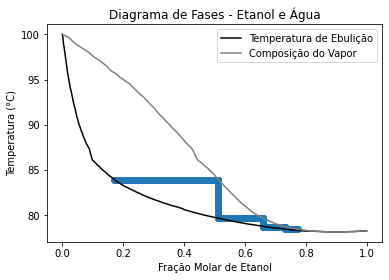

In [7]:
######################## Plotando diagrama de fases com os pontos obtidos ########################

fig = plt.figure()
ax1 = fig.add_subplot(111)
df_et_h2o.plot('Mole Fraction','C',legend=True, label = "Temperatura de Ebulição", ax=ax1, kind = 'line', color = 'black') # Plotando Temperatura de ebulição
df_et_h2o.plot('Mole Fraction.1','C',legend=True, label = "Composição do Vapor", ax=ax1, kind = 'line', color = 'gray') # Plotando composição do vapor
x = [ponto[0] for ponto in lista_final]
y = [ponto[1] for ponto in lista_final]
plt.scatter(x, y)
plt.title('Diagrama de Fases - Etanol e Água') # Definindo título do gráfico
plt.xlabel('Fração Molar de Etanol') # Definindo legendas dos eixos
plt.ylabel('Temperatura (°C)')
#plt.ylim(75, 90)
plt.show() # Plotando o diagrama de fases da mistura escolhida (etanol + água)

In [8]:
# Transformamos as tuplas retornadas pela função "destilacao_fracionada", que contêm as coordenadas dos pontos críticos, em duas listas
#x = [ponto[0] for ponto in lista_final]
#y = [ponto[1] for ponto in lista_final]

In [9]:
# Iteramos a função "create_frame", que cria um frame, para criar todos os frames
#for t in range(len(lista_final)):
#    create_frame(t, x, y, df_et_h2o)

In [10]:
# Salvamos frames e colocando em lista, para criar o gif
#frames = []
#for t in range(len(lista_final)):
#    image = imageio.imread(f'./Figuras - Desafio 2/img_{t}.png')
#    frames.append(image)

In [11]:
# Criamos e salvando o gif!!!
#imageio.mimsave('./Figuras - Desafio 2/example.gif', # output gif
#                frames,          # array of input frames
#                fps = 50)         # optional: frames per second

<center>
  <img src='./Figuras - Desafio 2/example.gif' style="width:500px;height:400px"/>
    
    Gif 2: processo de destilação fracionada da nossa mistura
</center>  

Agora você pode ver, de maneira dinâmica, como a destilação fracionada da nossa mistura de água com etanol 40% m/m ocorre! Percebe-se que, a partir de 4 etapas, as coordenadas dos pontos param de variar. No entanto, não conseguimos alcançar a pureza do etanol (que seria a fração molar "1"). Afinal, a mistura de álcool etílico + água é azeotrópica e, por isso, possui esse comportamento em altas concentrações de etanol.

A não-idealidade da mistura se dá a partir de seu azeotrópo, ou seja, existe um limite em relação à fração molar de etanol obtido a partir de uma destilação fracionada, dessa forma, invariavelmente, teremos que trabalhar com uma mistura de etanol e água, mas com uma fração molar de 0.8 de etanol.

Logo, o que obtemos após esse processo de destilação são dois líquidos: 
- Etanol enriquecido, com fração molar de 0.8 de etanol
- Água pura

Podemos obter a massa de ambos esses líquidos utilizando, admitindo uma eficiência de 100% no processo, a partir dos valores de massa molar dos compostos, massa inicial da mistura e frações molares na mistura final:

In [12]:
######################## Calculando massa dos líquidos obtidos (etanol enriquecido e água) ########################
 # definindo massa molar dos compostos, massa inicial da mistura e frações molares na mistura final:
MASSA_MOLAR_ETANOL= 46.07 # g/mol
MASSA_MOLAR_AGUA= 18.01528 #g/mol
FRACAO_MOLAR_ETANOL_NO_ETANOL_ENRIQUECIDO= lista_pontos[-1][0]
FRACAO_MOLAR_AGUA_NO_ETANOL_ENRIQUECIDO= 1- FRACAO_MOLAR_ETANOL_NO_ETANOL_ENRIQUECIDO
MASSA_INICIAL_ETANOL= PORCENTAGEM_MASSA_ETANOL*10000 # em gramas

# encontrando massas dos líquidos 
MOL_ETANOL_NO_ETANOL_ENRIQUECIDO= MASSA_INICIAL_ETANOL/ MASSA_MOLAR_ETANOL  # quantidade de mols de etanol na mistura de etanol enriquecido
MOL_AGUA_NO_ETANOL_ENRIQUECIDO= MOL_ETANOL_NO_ETANOL_ENRIQUECIDO*FRACAO_MOLAR_AGUA_NO_ETANOL_ENRIQUECIDO/FRACAO_MOLAR_ETANOL_NO_ETANOL_ENRIQUECIDO# mol DE água etanol enriq.

MASSA_AGUA_NO_ETANOL_ENRIQUECIDO= MASSA_MOLAR_AGUA * MOL_AGUA_NO_ETANOL_ENRIQUECIDO

MASSA_ETANOL_ENRIQUECIDO_KG= (MASSA_AGUA_NO_ETANOL_ENRIQUECIDO + MASSA_INICIAL_ETANOL)/1000 # massa total do etanol enriquecido, em quilogramas

MASSA_AGUA_PURA_KG= 1000- MASSA_ETANOL_ENRIQUECIDO_KG # calculando massa da água separada da mistura inicial, em quilogramas

print(f"A massa de etanol enriquecido no final da destilação fracionada é de {round(MASSA_ETANOL_ENRIQUECIDO_KG,2)} quilogramas")
print(f"A massa de etanol enriquecido no final da destilação fracionada é de {round(MASSA_AGUA_PURA_KG,2)} quilogramas")

A massa de etanol enriquecido no final da destilação fracionada é de 384.73 quilogramas
A massa de etanol enriquecido no final da destilação fracionada é de 615.27 quilogramas


### Problema C

#### Objetivo

Determinar a temperatura e a energia utilizadas para a evaporação da mistura enriquecida em álcool.

#### O que temos:
- Volume da mistura enriquecida em Etanol
- Pressão de vapor por temperatura da Água e do Etanol separadamente
- Fração Molar do Etanol na mistura
- Volume total
- Massa Molar

#### O que iremos fazer
- Encontrar as pressões de vapor por temperatura da água e do etanol separados

- Encontrar a pressão de vapor por temperatura da mistura, usando a lei de Raoult

- Calcular o gasto energético da evaporação, usando a equação de Clapeyron

Devido à não-idealidade da mistura enriquecida em etanol, a definição da evaporação dessa mistura se dá a partir de uma pressão de vapor específica para a mistura. Como esses dados experimentais não foram encontrados e a mistura possui uma fração molar de etanol muito próxima ao etanol puro, foi utilizada a **lei de Raoult** para aproximar a pressão de vapor da mistura em função da temperatura, a partir da pressão de vapor das duas substâncias puras e de suas frações molares.

O processo de evaporação se dará em pressão constante a 1 atm. É possível pensar, experimentalmente, em um balão contendo a mistura líquida, ao aumentar a temperatura, a substância irá evaporar, sendo que, devido à alta compressibilidade do balão, o seu volume irá se alterar e a pressão se manterá aproximadamente aproximadamente a 1 atm. Portanto, será utilizada uma temperatura em específico que possibilita a evaporação total da substância, e essa será a temperatura correspondente à pressão de vapor igual a 1 atm. A partir dos valores de pressão da temperatura da mudança de fase, é possível calcular o gasto energético desse processo termodinâmico pela **equação de Clapeyron**. Para tanto, será necessário, também, a variação de volume molar.

Primeiramente, então, recorremos ao [Dortmund Data Bank](http://www.ddbst.com/en/EED/PCP/VAP_C174.php) para ter acesso a valores experimentais de pressão de vapor da água e do etanol, os quais colocamos no seguinte dataframe, que denominamos "df_pv"

In [13]:
######################## Criando um dataframe das pressões de vapor da água e do etanol ########################

ARQUIVO_EXCEL = "Dados - Desafio 2/Pressão de Vapor - Etanol e Água.xlsx" # Chamando o arquivo excel com dados experimentais obtido no site Home Distiller
NOME_DA_PLANILHA_O = "Planilha1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 1, 2] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_pv = pd.read_excel( # Criando o Data Frame do diagrama de fases da mistura escolhida (etanol + água)
    ARQUIVO_EXCEL,
    sheet_name=NOME_DA_PLANILHA_O,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_pv[:][0:6]

,T [K],P [Pa] - H2O,P [Pa] - EtOH
0,293.15,2400.0,5786.0
1,303.15,4266.0,10454.0
2,313.15,7333.0,17877.0
3,323.15,12332.0,29456.0
4,333.15,19932.0,46839.0
5,343.15,31224.0,72273.0


Como é possível notar, o número de dados disponível no banco era bem baixo, insuficiente para encontrarmos os valores necessários. Logo, foi preciso desenvolver um código de interpolação, que aproxima os pontos dados pelas tabelas de duas funções: uma da pressão de vapor em função da temperatura da água, outra da pressão de vapor em função da temperatura do etanol. A partir dessas disso, utilizando a lei de Raoult, determinamos uma terceira função: a de pressão de vapor da mistura. Todas as três funções estão plotadas no gráfico 1.

In [14]:
######################## Chegando às funções de pressão de vapor da água e do etanol  ########################

# Dados de entrada (x e y)
x = np.array(df_pv['T [K]'][0:6])
y1 = np.array(df_pv['P [Pa] - H2O'][0:6])
y2 = np.array(df_pv['P [Pa] - EtOH'][0:6])

# Coeficientes do polinômio de grau 6
coefs1 = np.polyfit(x, y1, 6)
coefs2 = np.polyfit(x, y2, 6)

# Polinômio gerado
p1 = np.poly1d(coefs1)
p2 = np.poly1d(coefs2)

# Valores interpolados
xp = np.linspace(270, 370, 100)
yp1 = p1(xp)
yp2 = p2(xp)
warnings.filterwarnings('ignore')

c:\venv\ilumpy\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\venv\ilumpy\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
######################## Chegando à função de pressão de vapor da mistura pela Lei de Raoult  ########################

x1 = lista_pontos[-1][0]

# lei de Raoult
pt = p2*x1 + p1*(1-x1)

ypt = pt(xp)

TEMPERATURA_EVAPORACAO = metodo_bisseccao(pt, 101325, [300, 360]) # K

In [16]:
######################## Plotando Gráfico 1, que contem as funções de pressão de vapor ########################

plt.plot(x, y1, 'o', label='Pontos - Água')
plt.plot(x, y2, 'o', label='Pontos - Etanol')
plt.plot(TEMPERATURA_EVAPORACAO, 101325, 'o', label='Ponto de Evaporação') # ponto em que Pressão de Vapor=  100000 Pa= 1atm
plt.plot(xp, yp1, label='Interpolação Polinomial - Água')
plt.plot(xp, yp2, label='Interpolação Polinomial - Etanol')
plt.plot(xp, ypt, label='Interpolação Polinomial - Mistura')
plt.title("Pressão de vapor por temperatura da água, do etanol e da mistura")
plt.xlabel('Temperatura (K)')
plt.ylabel('Pressão de vapor (Pa)')
plt.rc('ytick', labelsize=7) 
plt.legend()
plt.savefig("./Figuras - Desafio 2/grafico_1.jpg", transparent=True)
plt.close()

<center>
  <img src='./Figuras - Desafio 2/grafico_1.jpg' style="width:600px;height:400px"/>
    
    Gráfico 1: funções da pressão de vapor da água, etanol- obtidas por 
    interpolação dos dados do dataframe- e da mistura - obtida pela Lei de Raoult.
</center>

Fonte: [Dortmund Databank](http://www.ddbst.com/en/EED/PCP/VAP_C174.php)

In [17]:
######################## Calculando a variação e volume molar, que será usada na equação de Clapeyron ########################

PRESSAO_DE_VAPOR = 1 # atm/K
MASSA_MOLAR_ETANOL = 46.07 #g/mol
MASSA_MOLAR_AGUA = 18 #g/mol

PORCENTAGEM_MASSA_ETANOL_ENRIQUECIDO = conversor_frac_molar_para_porc_massa(x1, MASSA_MOLAR_ETANOL, MASSA_MOLAR_AGUA)
MASSA_ETANOL = PORCENTAGEM_MASSA_ETANOL_ENRIQUECIDO*MASSA_ETANOL_ENRIQUECIDO_KG*10 #g
MASSA_AGUA = (100 - PORCENTAGEM_MASSA_ETANOL_ENRIQUECIDO)*MASSA_AGUA_PURA_KG*10 #g

VOLUME_MOLAR_MISTURA_LIQUIDA = V_m_l((VOLUME_TOTAL_MISTURA/2), MASSA_ETANOL, MASSA_AGUA, MASSA_MOLAR_ETANOL, MASSA_MOLAR_AGUA) # L/mol
VOLUME_MOLAR_GAS = V_m_g_ideal(TEMPERATURA_EVAPORACAO, PRESSAO_DE_VAPOR) # L/mol
DELTA_VOLUME_MOLAR = VOLUME_MOLAR_GAS - VOLUME_MOLAR_MISTURA_LIQUIDA # L/mol

print(f'A variação de volume molar durante o processo foi de {round(DELTA_VOLUME_MOLAR)} L/mol')

A variação de volume molar durante o processo foi de 29 L/mol


In [23]:
######################## Calculando o gasto energético do processo de evaporação, utilizando a variação de volume molar obtida ########################

CALOR_LATENTE = calor_latente_eq_clapeyron(PRESSAO_DE_VAPOR, TEMPERATURA_EVAPORACAO, DELTA_VOLUME_MOLAR) # J/mol

print(f'A temperatura escolhida para a evaporação foi {round(TEMPERATURA_EVAPORACAO - 273.15, 2)} °C e o gasto energético foi de {round(CALOR_LATENTE/1000, 2)} kJ/mol.')
print(f'Obteve-se, portando, {round(MASSA_ETANOL_ENRIQUECIDO_KG, 2)} de etanol enriquecido no estado gasoso.')

A temperatura escolhida para a evaporação foi 81.54 °C e o gasto energético foi de 1045.4 kJ/mol.
Obteve-se, portando, 384.73 de etanol enriquecido no estado gasoso.


### Problema D (problema EXTRA proposto pela dupla)

#### Objetivo:
Calcular a quantidade de hidrogênio que pode ser obtida a partir da água separada da mistura

#### O que temos:
- Volume de água obtido após a destilação fracionada

#### O que iremos fazer:
- Pesquisar, na literatura, o rendimento da produção de hidrogênio verde e o seu gasto energético.

Para incrementar a energia que será transferida ao ciclo de Rankine, nossa dupla teve a ideia de obter hidrogênio- considerado um dos mais eficientes combustíveis do mundo, devido ao seu alto calor de combustão- através da quebra da molécula de água obtida após a separação da mistura. 

Para calcular a massa de hidrogênio que podemos obter pela quantidade de água separada na destilação fracionada, já obtida em etapas anteriores

In [27]:
print(f'A massa de água obtida da destilação é de {round(MASSA_AGUA_PURA_KG,2)} kg')

A massa de água obtida da destilação é de 615.27 kg


Realizando pesquisas, encontramos o método de Water Splitting: uma técnica de obtenção de hidrogênio verde a partir da água, o qual consiste em uma separação da molécula de $H_2O$ em $H_2$ e $O_2$. A forma mais comum de realizar essa separação se dá por meio da eletrólise da água, em que são um catodo, idealmente de Platina, e um anodo, idealmente Óxido de Platina, são utilizados para, a partir da aplicação de uma diferença de potencial, formarem, respectivamente, o Hidrogênio e o Oxigênio. Em um processo real, o rendimento da eletrólise está em torno de, no máximo, cerca de 70% [1], portanto, é possível calcular a massa de Hidrogênio, em kg, obtida através da eletrólise de 621.16 kg de água como:

In [19]:
######################## Calculando massa de hidrogênio que pode ser gerada pela quebra da água ########################

RENDIMENTO = 0.70

MASSA_HIDROGENIO= massa_hidrogenio(MASSA_AGUA_PURA_KG, RENDIMENTO)
MASSA_HIDROGENIO

47.854484700919436

Fonte: 1- [Renewable electricity storage using electrolysis](https://www.pnas.org/doi/full/10.1073/pnas.1821686116)

Portanto, a partir da quantidade de água obtida através da destilação fracionada, foi possível produzir 48.3 kg de Hidrogênio, o qual será utilizado, juntamente à mistura enriquecida em etanol, para transferir energia ao ciclo de Rankine.

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](https://github.com/benetao/Termodinamica_Avancada), onde estão armazenados todos os notebooks e informações referentes aos desafios:

https://github.com/benetao/Termodinamica_Avancada

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases